In [1]:
import os
import subprocess

In [10]:
import pandas as pd
import numpy as np

In [8]:
El = "Cl"
A = "35"
Z = "17"
MT = "103"
offset = ""
new_data = "\"cross_section.dat\""
energy_min = 0
energy_max = 1E+99

In [6]:
# Search all files withing the EXFOR neutrons directory
endf_directory = "."

print("Searching for {} ENDF data file.".format(A + El))
endf_file_root = []
endf_file_name = []
for root, dirs, files in os.walk(endf_directory):
    for file in files:
        if file.endswith("{}.dat".format(Z + "-" + El + "-" + A)):
            endf_file_root.append(os.path.join(root, file))
            endf_file_name.append(file)

if len(endf_file_root) == 1:
    print("Succesfully located {} ENDF file.".format(A + El))
    endf_ml_name = "ML_" + endf_file_name[0]
else:
    print("{} ENDF File was not found.".format(A + El))

Searching for 35Cl ENDF data file.
Succesfully located 35Cl ENDF file.


In [21]:
for_test = pd.DataFrame({"Energy": np.linspace(0,10,11), "Data": np.linspace(40,90,11)})

In [37]:
with open("test.sh", "w") as myfile:
    # BASH SCRIPT
    myfile.write("dece -o {} {} \n".format(endf_ml_name, endf_file_root[0]))
    myfile.write("tpid \"ML Modified ENDF File PJVV\" \n")
    myfile.write("delpoint 3 {} {} {} \n".format(MT, energy_min, energy_max))
    for i in for_test.values:
        myfile.write("addpoint 3 103 {} {} \n".format(i[0], i[1]))
    myfile.write(
"""
make4
calc 3 = 4+16
calc 3 = 3+22
calc 3 = 3+28
calc 3 = 3+32
calc 3 = 3+102
calc 3 = 3+103
calc 3 = 3+104
calc 3 = 3+105
calc 3 = 3+106
calc 3 = 3+107
calc 3 = 3+111
calc 3 = 3+112
calc 2 = 1-3  
calc 1 = 2+3 
quit
""")
    myfile.close()

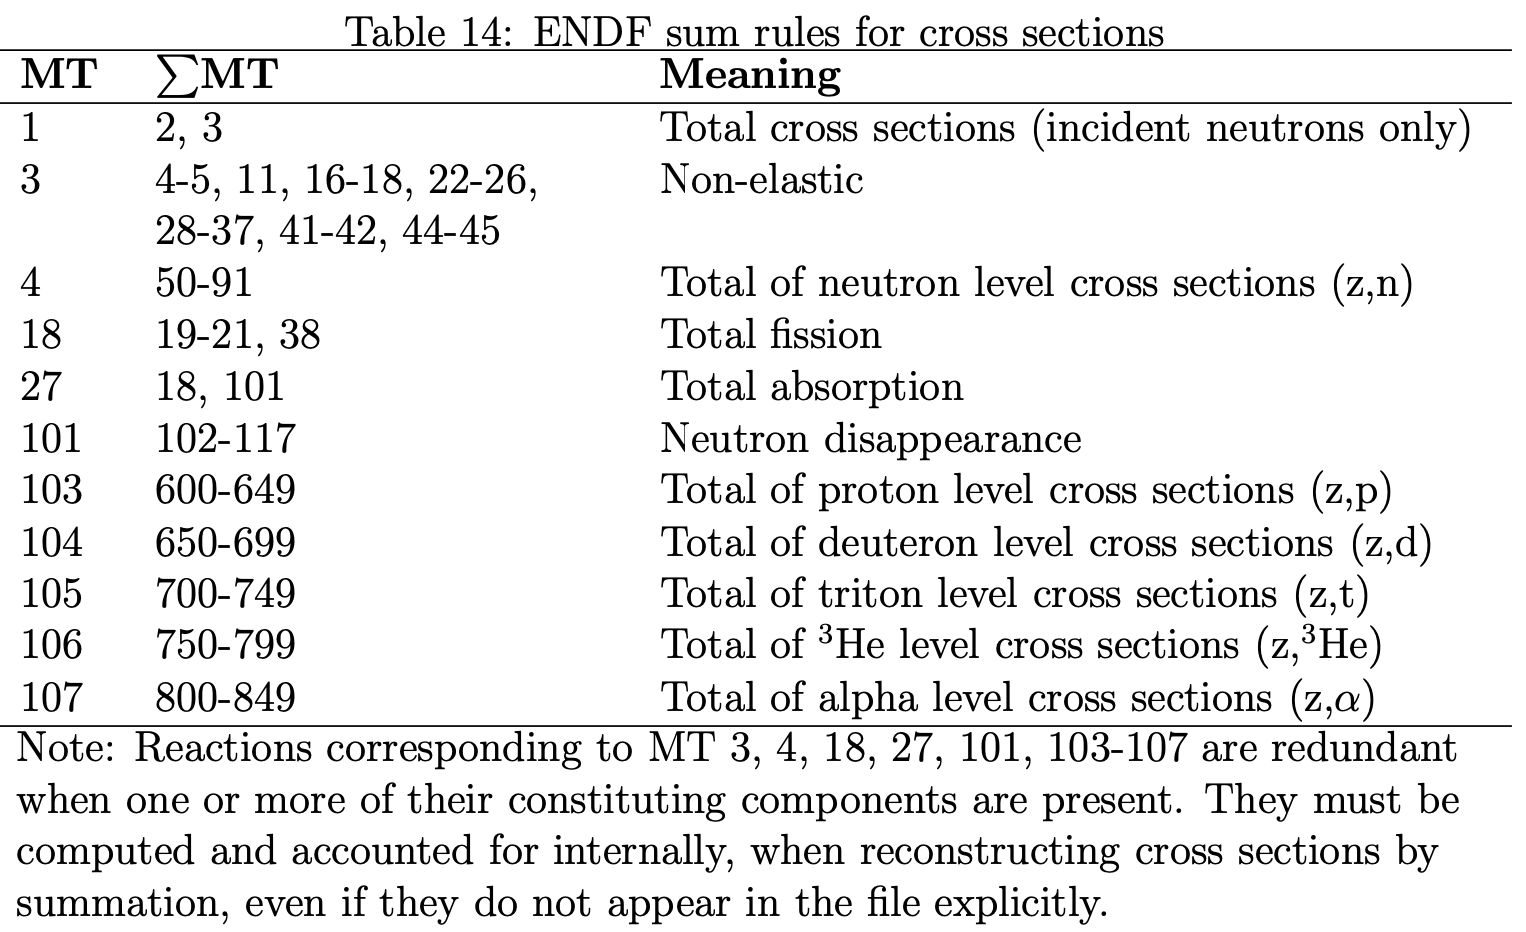

In [ ]:
"""
make4
calc 3 = 4+5
calc 3 = 3+11
calc 3 = 3+16
calc 3 = 3+17
calc 3 = 3+18
calc 3 = 3+22
calc 3 = 3+23
calc 3 = 3+24
calc 3 = 3+25
calc 3 = 3+26
calc 3 = 3+28
calc 3 = 3+29
calc 3 = 3+30
calc 3 = 3+31
calc 3 = 3+32
calc 3 = 3+33
calc 3 = 3+34
calc 3 = 3+35
calc 3 = 3+36
calc 3 = 3+37
calc 3 = 3+41
calc 3 = 3+42
calc 3 = 3+44
calc 3 = 3+45
calc 2 = 1-3  
calc 1 = 2+3 
quit
""")